Basics

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt
#clustering
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
from qtensor import get_edge_subgraph
import torch

2021-07-12 08:54:15,314- WARNING•	QuickBB solver is unavailable
2021-07-12 08:54:15,316- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


# Importing graphs

In [3]:
g_data = []
with open('20NodeRandomData1.csv', 'r', newline = '') as s:
  spamreader = csv.reader(s, quotechar='|')
  for row in spamreader:
    new_row = [float(i) for i in row]
    g_data.append(new_row)

In [4]:
resi = []
with open('20NodeRandomGraph1.csv', 'r', newline = '') as g:
  spamreader = csv.reader(g, quotechar='|')
  for row in spamreader:
    resi.append(row)

#convert bunch of rows to matrices
n = int(len(resi)/20)
mat_list = []
for i in range(n):
  array = []
  for j in range(20):
    row = resi[i*20 +j]
    row = [float(k) for k in row]
    array.append(row)
  mat_list.append(array)

In [39]:
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

In [40]:
g_list = mats_to_graphs(mat_list)

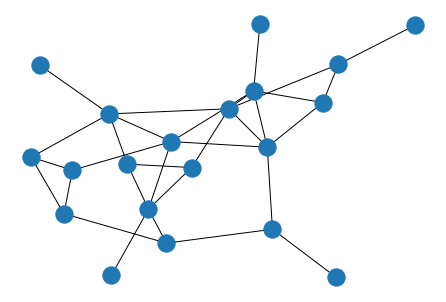

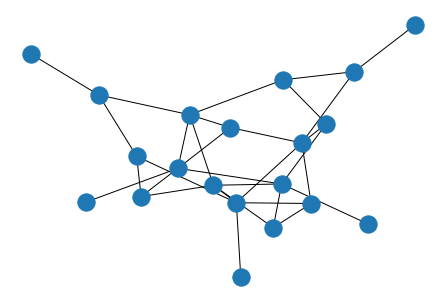

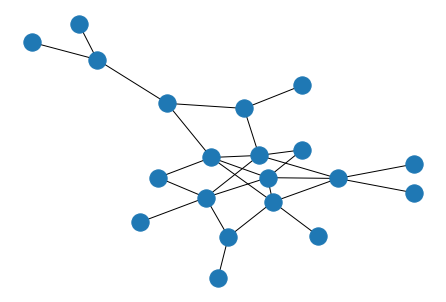

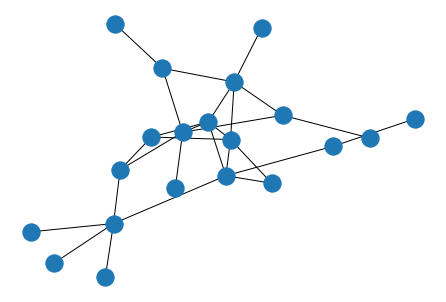

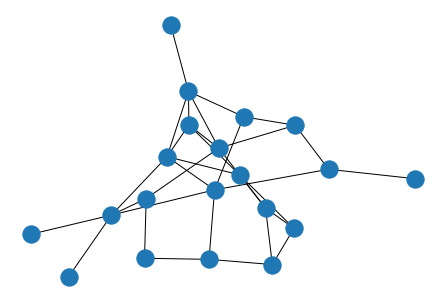

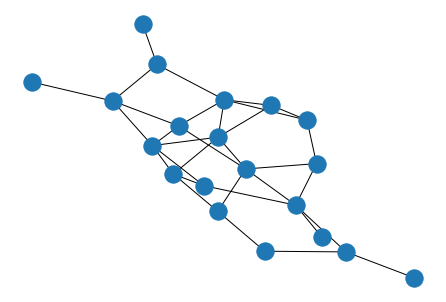

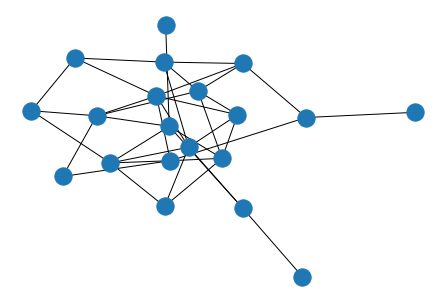

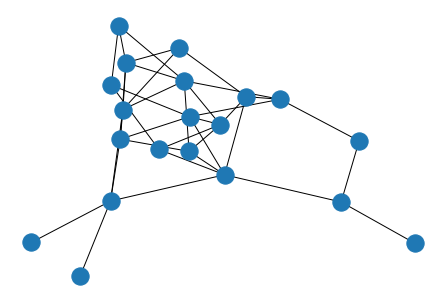

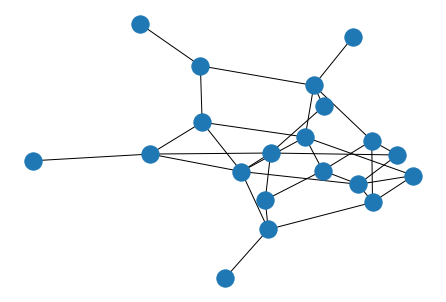

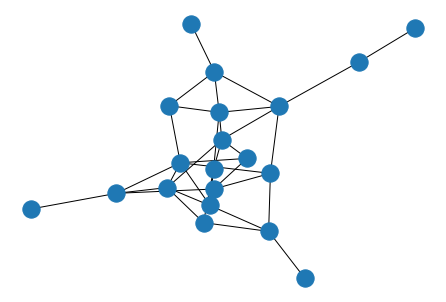

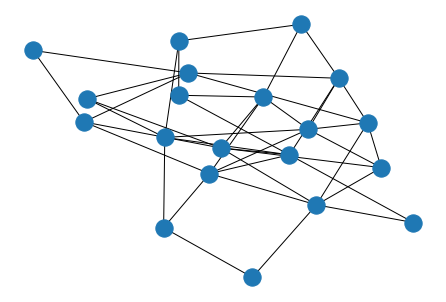

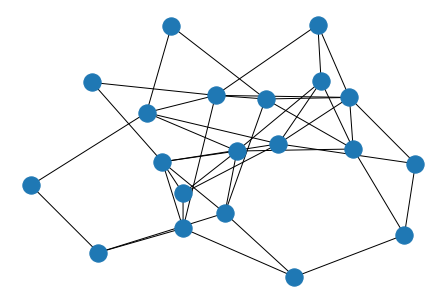

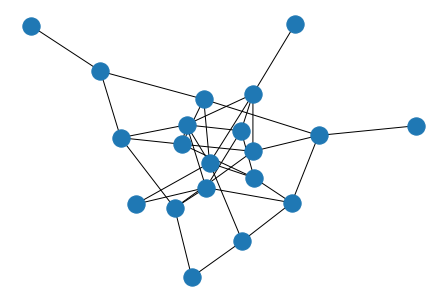

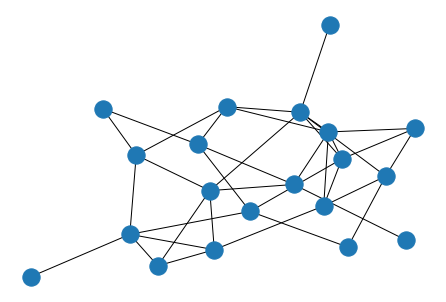

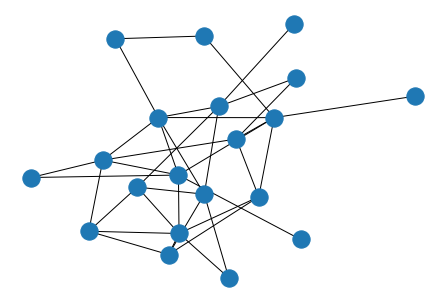

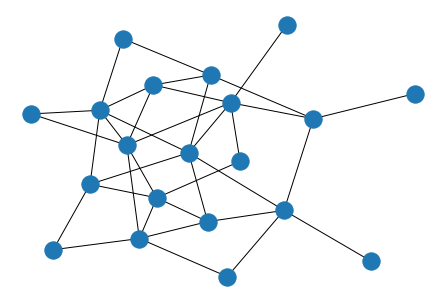

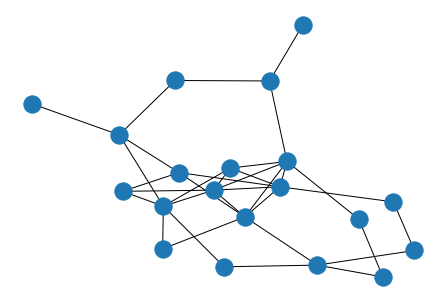

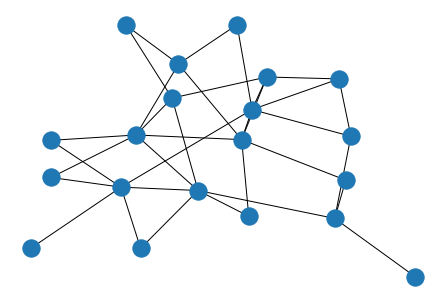

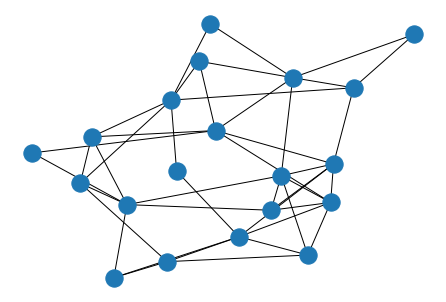

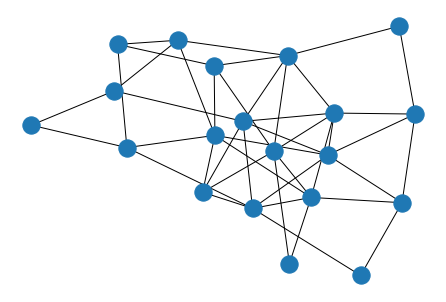

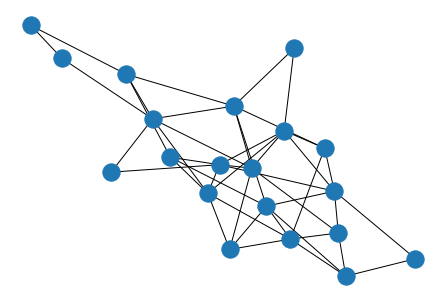

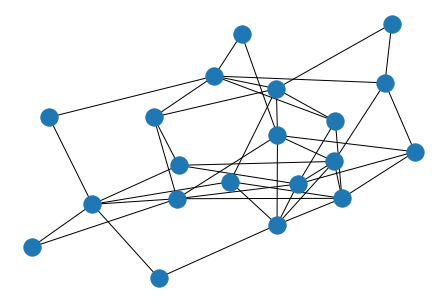

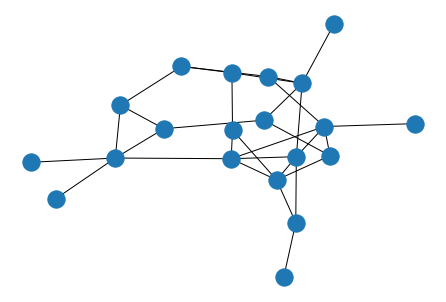

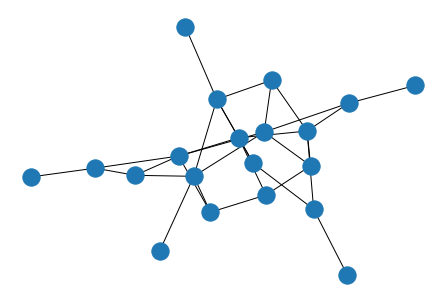

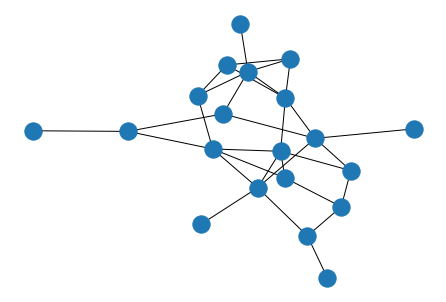

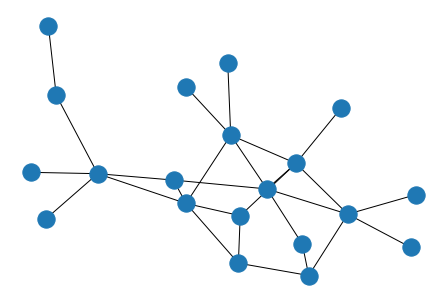

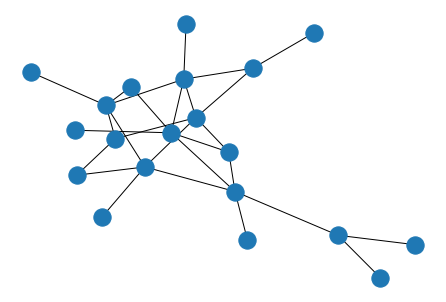

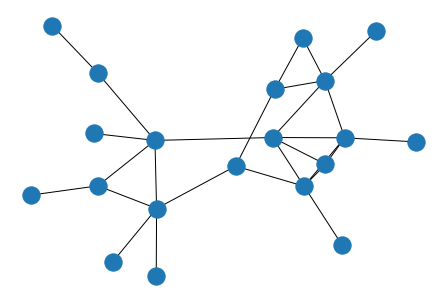

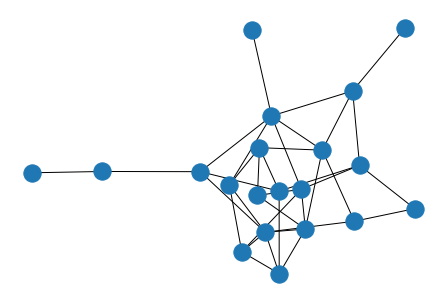

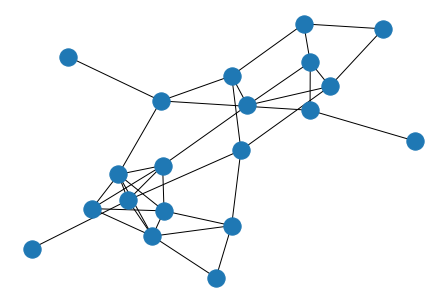

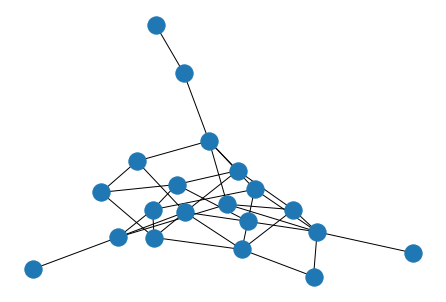

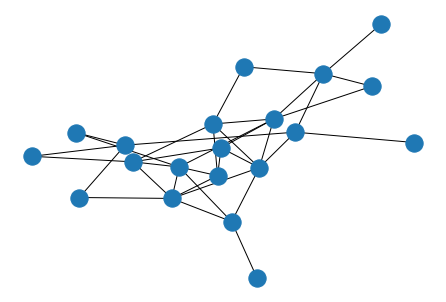

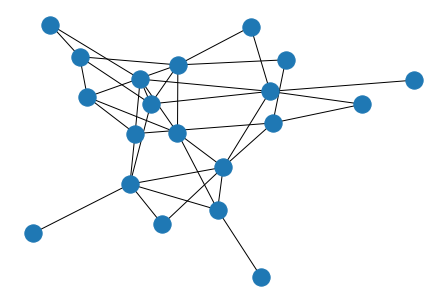

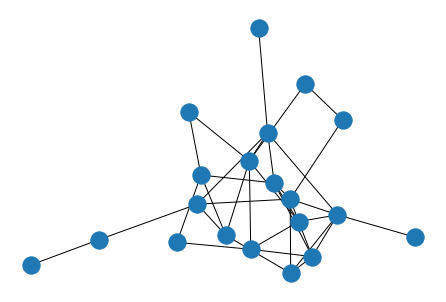

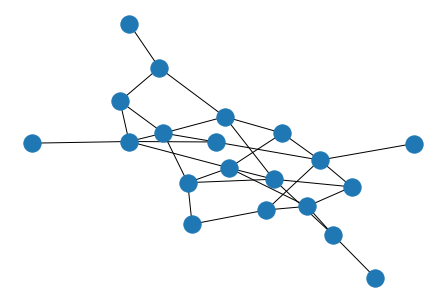

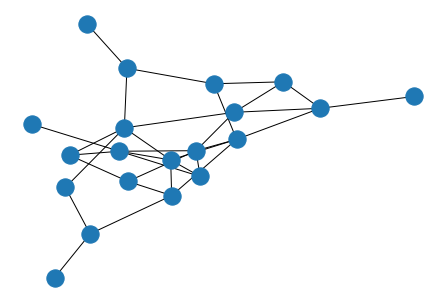

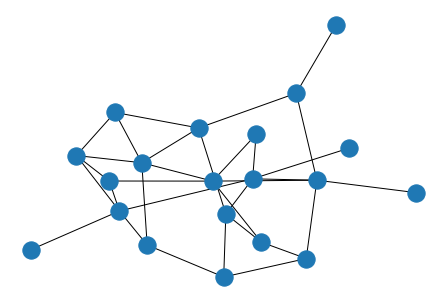

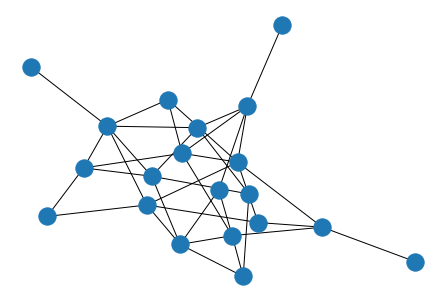

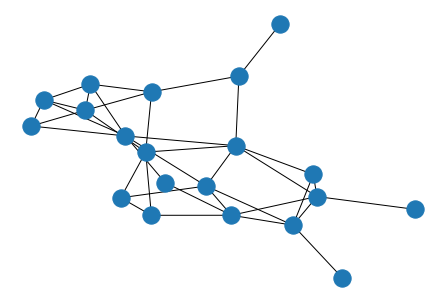

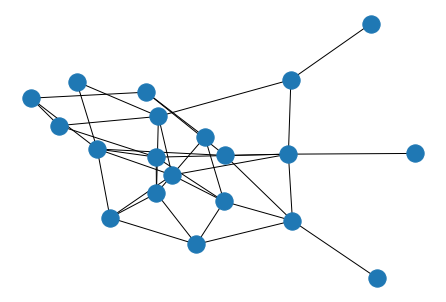

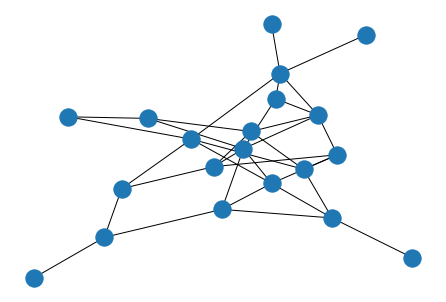

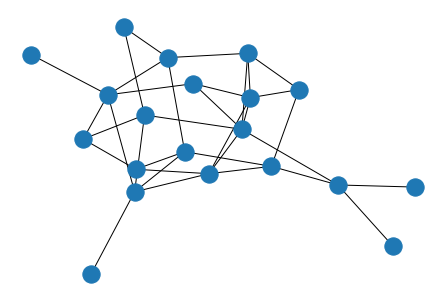

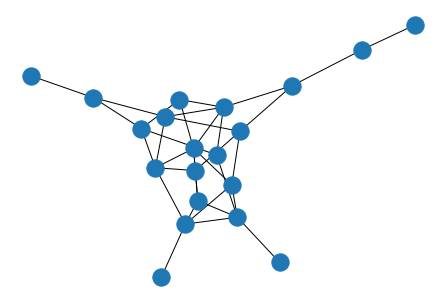

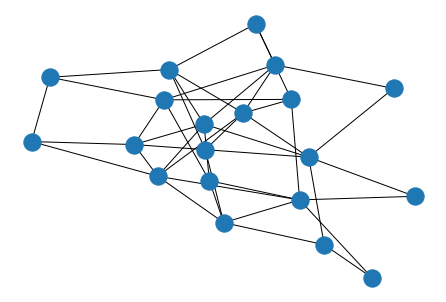

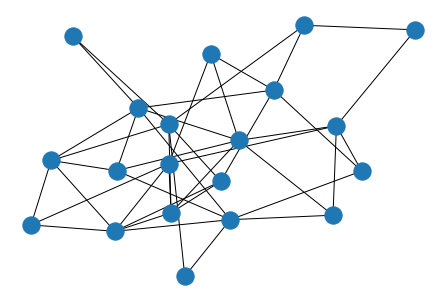

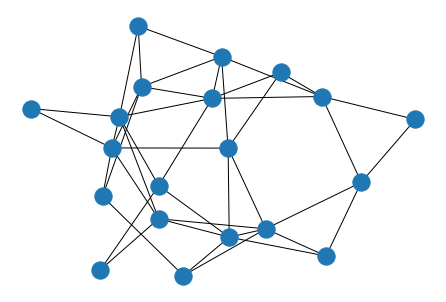

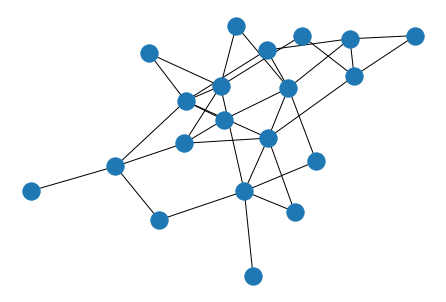

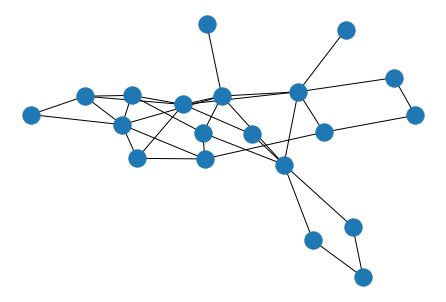

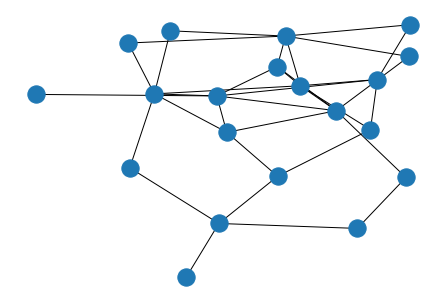

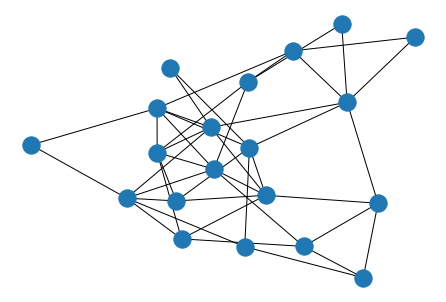

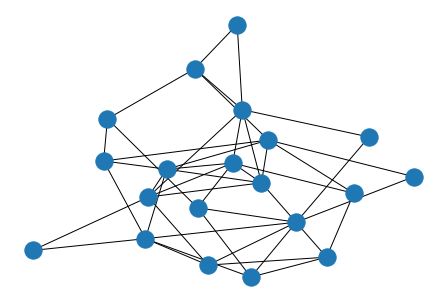

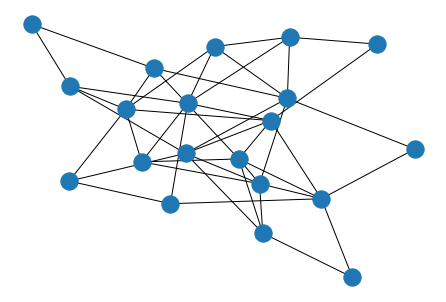

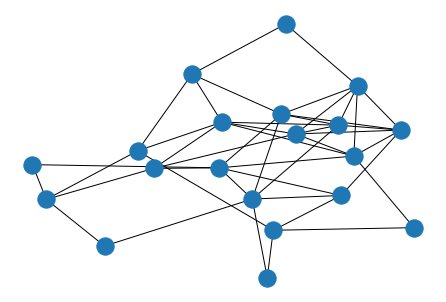

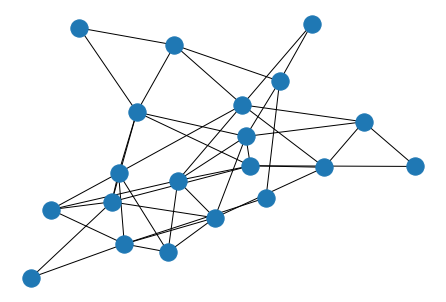

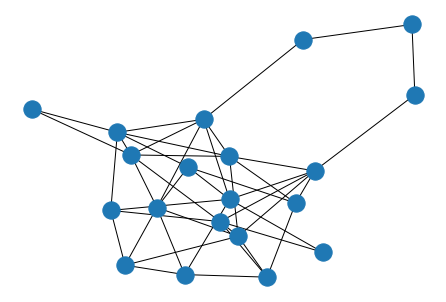

In [41]:
for i in g_list:
  nx.draw(i)
  plt.show()

In [42]:
new_g_list = [g_list[i] for i in range(1,20,2)]

In [43]:
len(new_g_list)

10

# Generating library of p=2 subgraphs

In [44]:
def is_isomorphic(graph, graphs):
    """
    Checks if a graph is isomorphic with any graph in the list graphs
    """
    if len(graphs) ==0:
        return False
    
    for g in graphs:
        if nx.is_isomorphic(graph, g):
            return True
    return False

In [45]:
master = {} #dictionary with keys as subgraphs and values as central edges
iterr = 0
for G in new_g_list:
    iterr+=1
    print(iterr)
    for edge in G.edges:
        sub = get_edge_subgraph(G, edge = edge, dist = 2)
        if not is_isomorphic(sub, master.keys()):
            master[sub] = edge
            

1
2
3
4
5
6
7
8
9
10


In [46]:
len(master)

339

# Now finding all their global optima

In [47]:
## My Code
def get_qaoa_params(graph, edge=None, gamma=[0.5], beta=[0.5], steps=50):
    loss_history, params_history = popt.qaoa_maxcut_torch(graph, gamma, beta,
                                                          ordering_algo='greedy',
                                                          Opt=torch.optim.RMSprop,
                                                          edge=edge,
                                                          opt_kwargs=dict(lr=0.002),
                                                          steps=steps,
                                                          pbar=False)
    best_ix = np.argmin(loss_history)
    return params_history[best_ix], loss_history[best_ix]

In [48]:
def subgraph_optimal_param_and_cost(graph, master, p=2, seeds=20, steps=200):
    '''
    Optimize parameters of a subgraph, do so (seed) many times with random initial
    ized parameters

    Return: array of Results of (seed) many optimization runs and the index of 
    array corresponding to max energy
    '''
    results = []
    s = 0 #iterator
    max_energy = -1
    max_index = 0
    edge = master[graph]

    while s<seeds:
        gamma = [np.random.rand() for i in range(p)]
        beta = [np.random.rand() for i in range(p)]
        params, loss = get_qaoa_params(graph, edge=edge, gamma=gamma, beta=beta, steps=steps)
        gamma_opt, beta_opt = params[0], params[1]
        energy = (1-loss)/2
        result = [gamma_opt, beta_opt, energy]
        results.append(result)

        # comparing with max
        if energy >max_energy:
            max_index = s
            max_energy = energy
        s+=1
    max_result = results[max_index]
    return max_result

In [50]:
graph_optimizations = []
iterr = 0

for sub in master.keys():
    iterr+=1
    print(iterr)
    result = subgraph_optimal_param_and_cost(sub, master, p=2, seeds=20, steps=200)
    graph_optimizations.append(result)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
Treewidth 6
33
Treewidth 4
34
Treewidth 7
35
Treewidth 6
36
Treewidth 9
37
Treewidth 8
38
Treewidth 8
39
Treewidth 7
40
Treewidth 6
41
Treewidth 6
42
Treewidth 4
43
Treewidth 8
44
Treewidth 7
45
Treewidth 7
46
Treewidth 8
47
Treewidth 10
48
Treewidth 9
49
Treewidth 7
50
Treewidth 6
51
Treewidth 10
52
Treewidth 9
53
Treewidth 8
54
Treewidth 9
55
Treewidth 11
56
Treewidth 9
57
Treewidth 9
58
Treewidth 8
59
Treewidth 8
60
Treewidth 9
61
Treewidth 6
62
Treewidth 6
63
Treewidth 9
64
Treewidth 6
65
Treewidth 7
66
Treewidth 8
67
Treewidth 11
68
Treewidth 8
69
Treewidth 8
70
Treewidth 6
71
Treewidth 8
72
Treewidth 8
73
Treewidth 7
74
Treewidth 8
75
Treewidth 10
76
Treewidth 9
77
Treewidth 11
78
Treewidth 8
79
Treewidth 5
80
Treewidth 11
81
Treewidth 6
82
Treewidth 4
83
Treewidth 9
84
Treewidth 6
85
Treewidth 6
86
Treewidth 6
87
Treewidth 10
88
Treewidth 12
89
Treewidth 8
90
Treewidth 10
91
Treewidth 12
92
Tr

Data

In [51]:
graph_optimizations

[[array([0.6036311, 1.1788232], dtype=float32),
  array([0.6097957 , 0.59082365], dtype=float32),
  0.848997950553894],
 [array([0.37949306, 0.04954527], dtype=float32),
  array([0.09507708, 0.7913121 ], dtype=float32),
  0.6625211983919144],
 [array([0.5584651 , 0.10195749], dtype=float32),
  array([0.63003415, 0.05734148], dtype=float32),
  0.6367262005805969],
 [array([0.5714113, 0.6195409], dtype=float32),
  array([0.6730157 , 0.39976156], dtype=float32),
  0.754317969083786],
 [array([0.5681357 , 0.10451626], dtype=float32),
  array([0.6735348 , 0.10180153], dtype=float32),
  0.7412736266851425],
 [array([0.07420093, 0.15837808], dtype=float32),
  array([ 0.34821546, -0.09434192], dtype=float32),
  0.8195548355579376],
 [array([0.13341741, 0.44758487], dtype=float32),
  array([0.5696103, 0.6745409], dtype=float32),
  0.6497597098350525],
 [array([0.8803442 , 0.04608624], dtype=float32),
  array([-0.0904007 ,  0.20565082], dtype=float32),
  0.658224880695343],
 [array([0.4239519, 0

# Now Computing tranferability

In [52]:
def get_edge_contribution(graph, edge, gamma, beta):
    sim = qtensor.QtreeSimulator()
    composer = qtensor.DefaultQAOAComposer(graph, gamma=gamma, beta=beta)
    composer.energy_expectation_lightcone(edge)
    return np.real(sim.simulate_batch(composer.circuit)[0])

In [53]:
def mod_transferability_matrix_new(graphs, p=2, graph_optimizations = graph_optimizations):
    '''
    Returns a len(graph) x len(graph) matrix with tranferability coefficients 
    between all possible pairs of graphs
    '''
    #create the transferability matrix
    matrix = np.zeros((len(graphs), len(graphs)))

    for i, donor in enumerate(graphs):
        donor_result = graph_optimizations[i]
        print('###############')
        print("i is" + str(i))

        for j, acceptor in enumerate(graphs):
            #print(j)
            #acceptors max energy first
            acc_energy = graph_optimizations[j][2]
            donor_gamma = donor_result[0]
            donor_beta = donor_result[1]
            acceptor_edge = master[acceptor]
            
            trans_loss = get_edge_contribution(acceptor, edge = acceptor_edge,gamma = donor_gamma, beta = donor_beta)
            trans_energy = (1-trans_loss)/2
            # print('donors is : ' + str(i))
            # print('acceptor is : ' + str(j))
            # print('trans energy is: ' + str(trans_energy))
            # print('max energy of acceptor is : ' + str(acc_energy))
            matrix[i,j] += trans_energy/acc_energy
    return matrix

In [54]:
subgraphs = []
for sub in master.keys():
    subgraphs.append(sub)

In [55]:
matrix = mod_transferability_matrix_new(graphs = subgraphs, p=2, graph_optimizations = graph_optimizations)

###############
i is0
###############
i is1
###############
i is2
###############
i is3
###############
i is4
###############
i is5
###############
i is6
###############
i is7
###############
i is8
###############
i is9
###############
i is10
###############
i is11
###############
i is12
###############
i is13
###############
i is14
###############
i is15
###############
i is16
###############
i is17
###############
i is18
###############
i is19
###############
i is20
###############
i is21
###############
i is22
###############
i is23
###############
i is24
###############
i is25
###############
i is26
###############
i is27
###############
i is28
###############
i is29
###############
i is30
###############
i is31
###############
i is32
###############
i is33
###############
i is34
###############
i is35
###############
i is36
###############
i is37
###############
i is38
###############
i is39
###############
i is40
###############
i is41
###############
i is42
###############
i is4

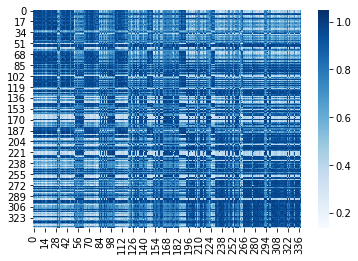

In [56]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

# Index= labels
# Cols = labels
df = DataFrame(matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)

sns.heatmap(df, annot=False, cmap="Blues")

In [57]:
a_file = open("p_2_random_subgraphs_matrix_of_20_Node.txt", "w")
for row in matrix:
    np.savetxt(a_file, row)
a_file.close()

In [58]:
matrix

array([[0.99999914, 0.93453473, 0.91191115, ..., 0.67555994, 0.52267651,
        0.62611491],
       [0.85658528, 0.99999992, 0.97241815, ..., 0.48976534, 0.42132422,
        0.69571697],
       [0.89774241, 0.99189721, 0.99999951, ..., 0.49041265, 0.43136871,
        0.67317834],
       ...,
       [0.36476121, 0.40701305, 0.45305257, ..., 0.99999998, 0.90529931,
        0.65197715],
       [0.67438247, 0.83685682, 0.84551579, ..., 0.96075919, 0.99999885,
        0.87662545],
       [0.3256989 , 0.3390274 , 0.45081944, ..., 0.50576436, 0.42507035,
        0.9999997 ]])